## Interpretare le curve di apprendimento
Ricordiamo dall'esempio della lezione precedente che Keras conserva una cronologia delle perdite di addestramento e di convalida nel corso delle epoche di addestramento del modello. In questa lezione impareremo a interpretare queste curve di apprendimento e a usarle per guidare lo sviluppo del modello. In particolare, esamineremo le curve di apprendimento alla ricerca di prove di underfitting e overfitting ed esamineremo un paio di strategie per correggerle.

Le informazioni contenute nei dati di addestramento possono essere di due tipi: il segnale e il rumore. Il segnale è la parte generalizzabile, quella che può aiutare il nostro modello a fare previsioni su nuovi dati. Il rumore è quella parte che è vera solo per i dati di addestramento; il rumore è tutta la fluttuazione casuale che proviene dai dati del mondo reale o tutti gli schemi accidentali e non informativi che non possono effettivamente aiutare il modello a fare previsioni. Il rumore è la parte che potrebbe sembrare utile ma in realtà non lo è.

L'addestramento di un modello avviene scegliendo i pesi o i parametri che minimizzano la perdita su un set di addestramento. Tuttavia, per valutare con precisione le prestazioni di un modello, è necessario valutarlo su un nuovo insieme di dati, i dati di validazione. (Per un ripasso, si veda la lezione sulla validazione dei modelli in Introduzione all'apprendimento automatico).

Quando addestriamo un modello, abbiamo tracciato la perdita sul set di addestramento, epoca per epoca. A questo aggiungeremo un grafico dei dati di validazione. Questi grafici vengono chiamati **curve di apprendimento**. Per addestrare efficacemente i modelli di deep learning, dobbiamo essere in grado di interpretarli.
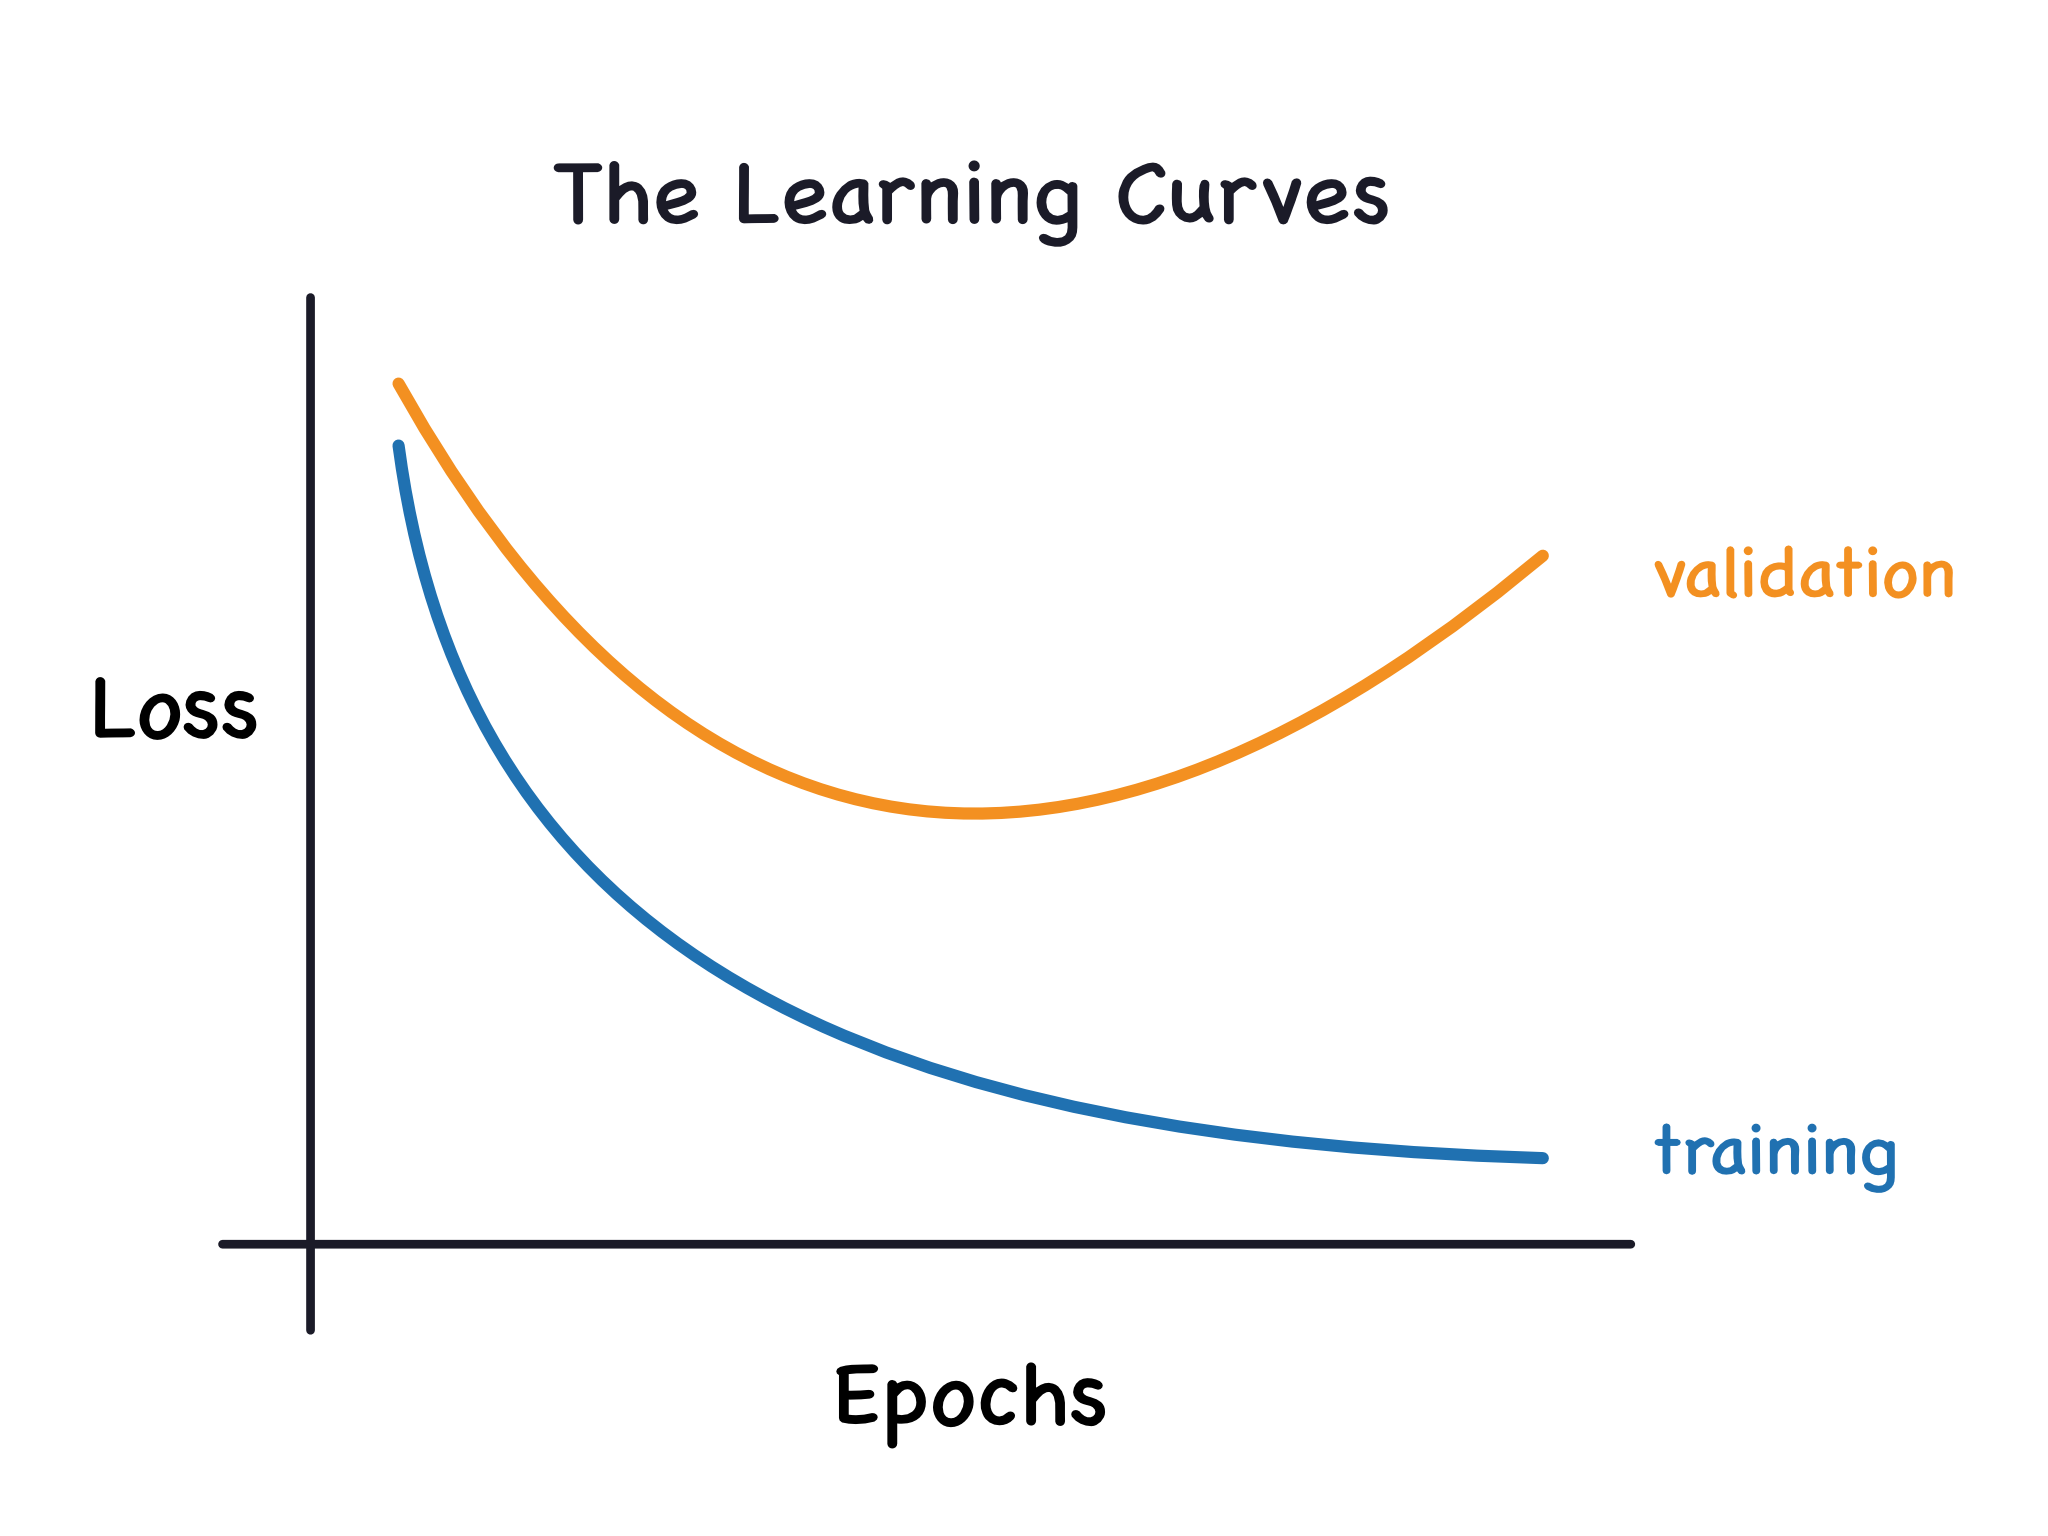

Ora, la perdita di addestramento diminuisce sia quando il modello apprende il segnale sia quando apprende il rumore. Ma la perdita di validazione diminuisce solo quando il modello apprende un segnale. (Qualsiasi rumore il modello abbia appreso dal set di allenamento non si generalizzerà ai nuovi dati). Quindi, quando un modello apprende un segnale entrambe le curve scendono, ma quando apprende un rumore si crea un divario tra le curve. La dimensione del divario indica la quantità di rumore appresa dal modello.

L'ideale sarebbe creare modelli che imparino tutto il segnale e nessun rumore. Questo non accadrà praticamente mai. Invece facciamo un'operazione. Possiamo far sì che il modello apprenda più segnale al costo di apprendere più rumore. Finché l'operazione è a nostro favore, la perdita di convalida continuerà a diminuire. Dopo un certo punto, tuttavia, l'operazione può ritorcersi contro di noi, il costo supera il beneficio e la perdita di convalida inizia ad aumentare.

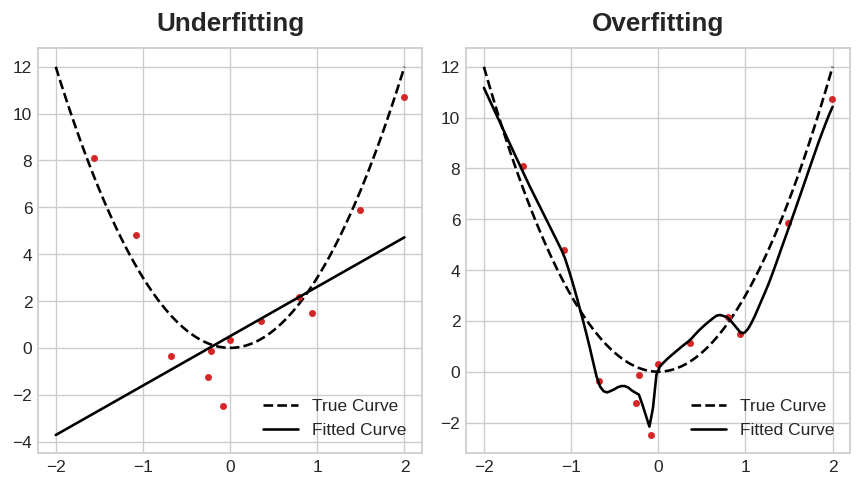

Questo compromesso indica che possono verificarsi due problemi durante l'addestramento di un modello: un segnale insufficiente o un rumore eccessivo. Si parla di underfitting del set di addestramento quando la perdita non è così bassa come potrebbe essere perché il modello non ha appreso abbastanza segnale. L'overfitting del set di addestramento si verifica quando la perdita non è così bassa come potrebbe essere perché il modello ha appreso troppo rumore. Il trucco per addestrare i modelli di deep learning è trovare il miglior equilibrio tra i due.

Vedremo un paio di modi per ottenere più segnale dai dati di addestramento, riducendo al contempo la quantità di rumore.

### Capacità
La **capacity** di un modello si riferisce alla dimensione e alla complessità dei modelli che è in grado di apprendere. Per le reti neurali, questa capacità è determinata in larga misura dal numero di neuroni e dal modo in cui sono collegati tra loro. Se sembra che la rete non si adatti ai dati, si dovrebbe provare ad aumentarne la capacità.

La **capacità di una rete** può essere aumentata sia allargandola (aggiungendo più unità agli strati esistenti) sia approfondendola (aggiungendo altri strati). Le reti più ampie imparano più facilmente le relazioni lineari, mentre quelle più profonde preferiscono quelle non lineari. Quale sia la soluzione migliore dipende dal set di dati.

### Early stopping
Abbiamo detto che quando un modello apprende troppo rumore, la perdita di convalida può iniziare ad aumentare durante l'addestramento. Per evitare che ciò accada, possiamo semplicemente interrompere l'addestramento quando sembra che la perdita di convalida non stia più diminuendo. L'interruzione dell'addestramento in questo modo è chiamata **arresto anticipato**.

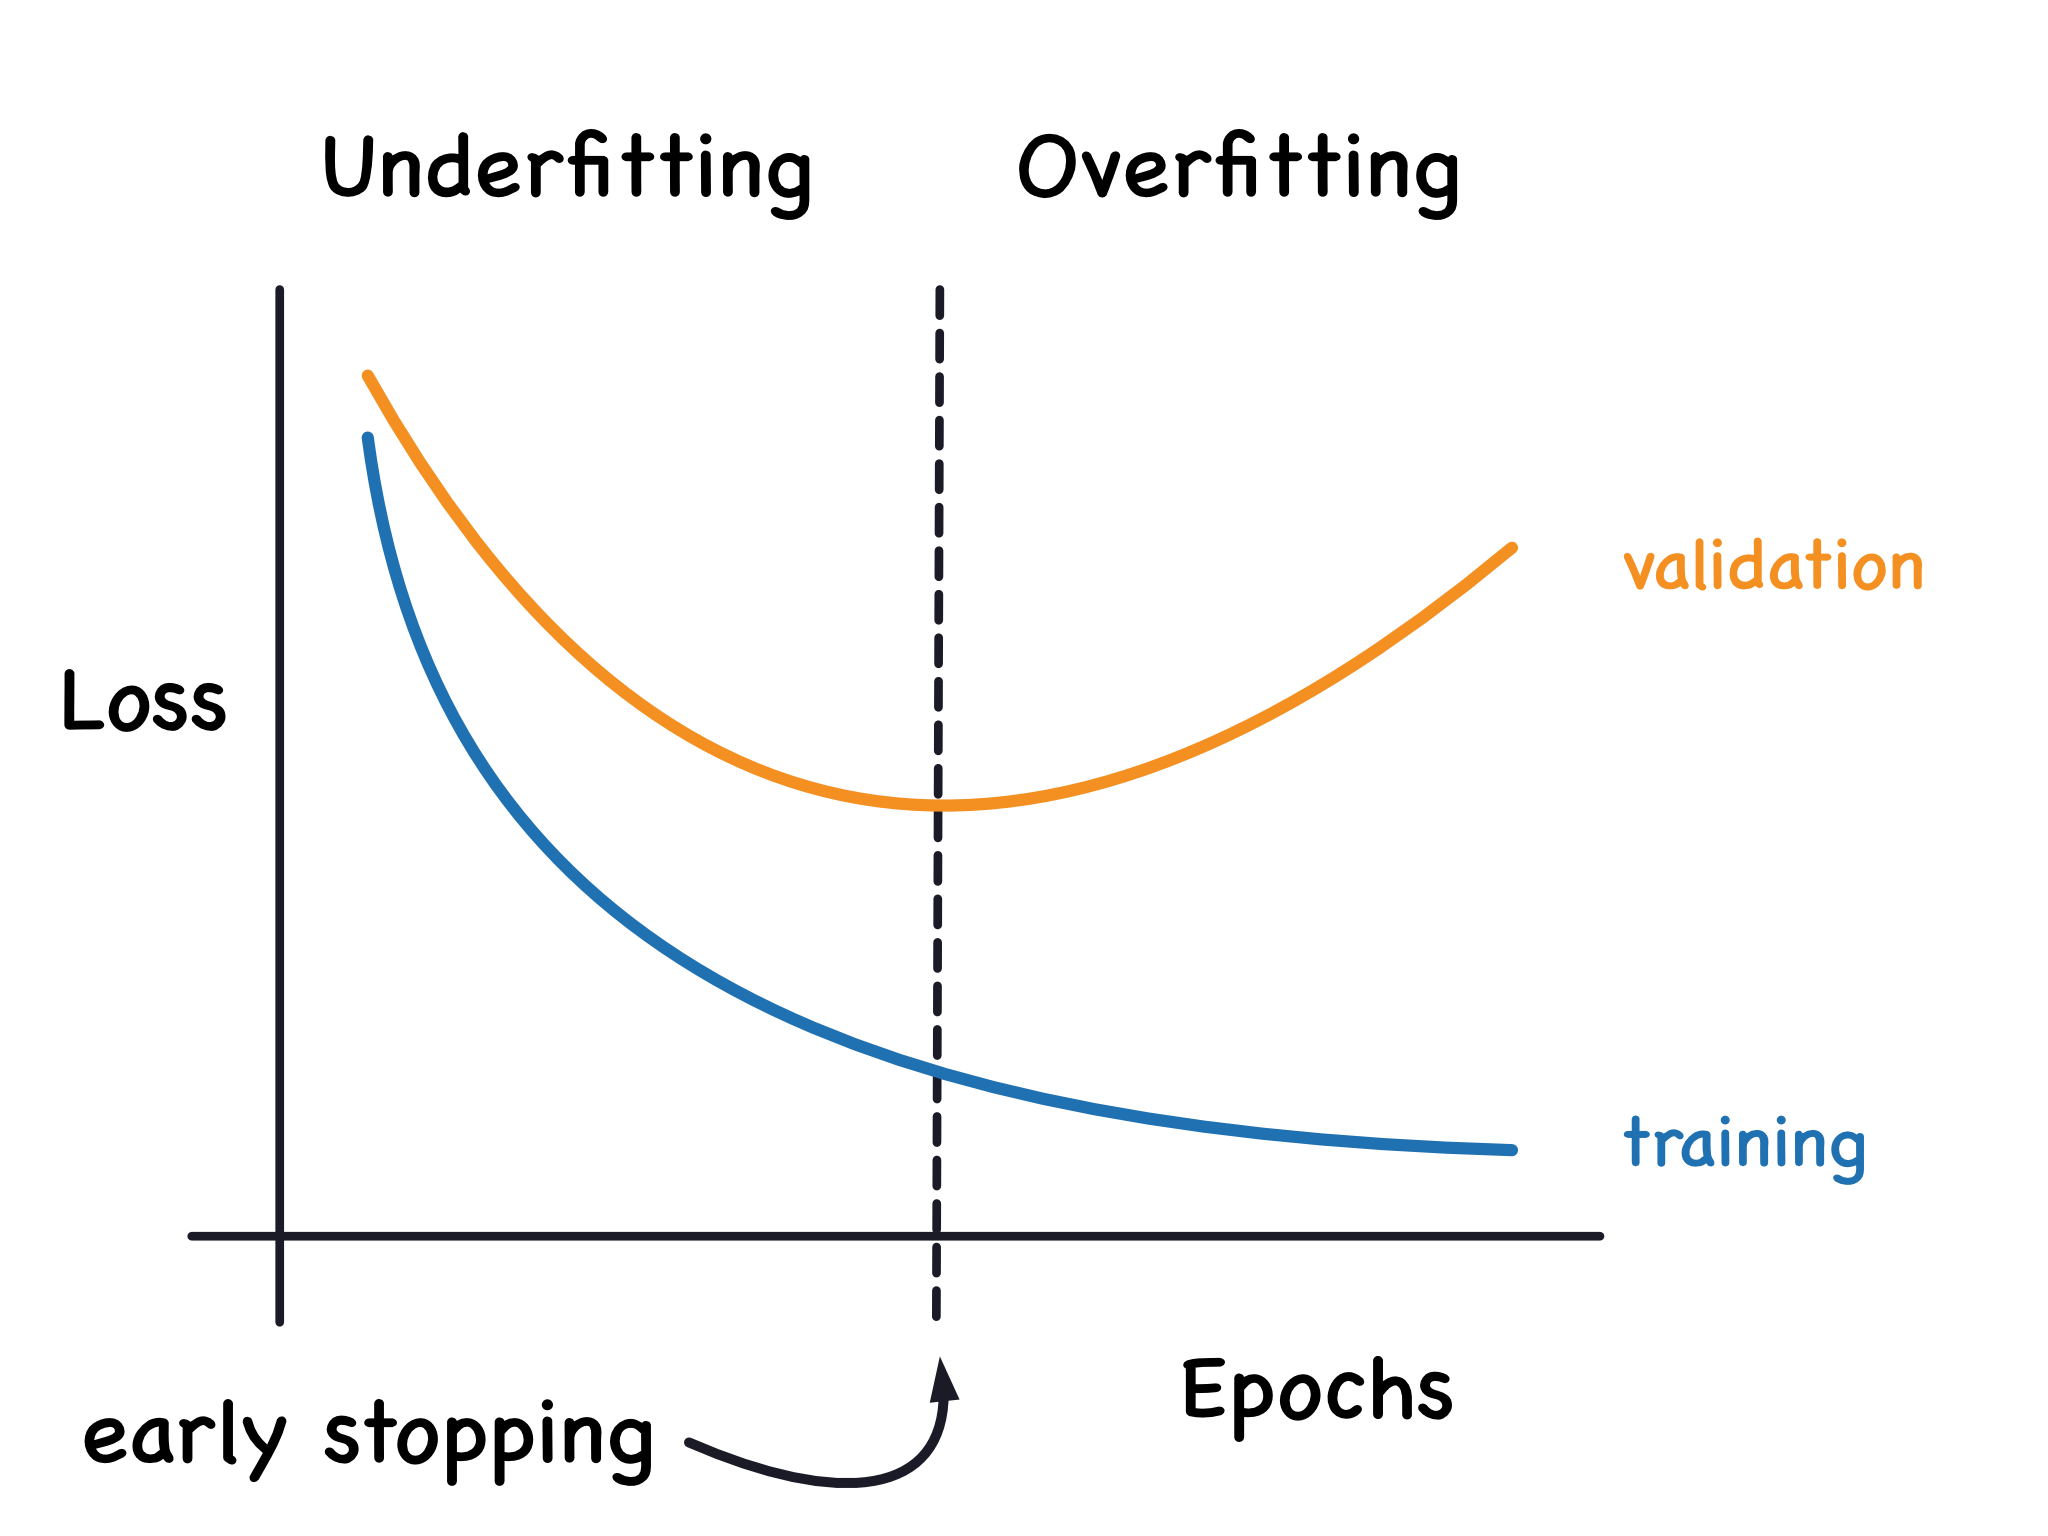

Una volta rilevato che la perdita di convalida sta iniziando a salire di nuovo, possiamo reimpostare i pesi al punto in cui si è verificato il minimo. In questo modo si evita che il modello continui ad apprendere il rumore e ad adattarsi eccessivamente ai dati.

L'addestramento con arresto precoce significa anche che si corre meno il rischio di interrompere l'addestramento troppo presto, prima che la rete abbia terminato l'apprendimento del segnale. Quindi, oltre a prevenire l'overfitting dovuto a un addestramento troppo lungo, l'arresto anticipato può anche prevenire l'underfitting dovuto a un addestramento non sufficientemente lungo. Basta impostare gli epoch di addestramento a un numero elevato (più di quanto sia necessario) e l'arresto anticipato si occuperà del resto.

### Aggiunta dell'arresto anticipato
In **Keras**, l'arresto anticipato viene incluso nell'addestramento tramite un **callback**. Un **callback** è semplicemente una funzione da eseguire ogni tanto mentre la rete si allena. Il callback per l'arresto anticipato viene eseguito dopo ogni epoca. (**Keras** ha una serie di callback utili predefiniti, ma è possibile definirne di propri).

Questi parametri dicono: "Se non c'è stato un miglioramento di almeno 0,001 nella perdita di convalida rispetto alle 20 epoche precedenti, interrompere l'addestramento e mantenere il modello migliore trovato". A volte può essere difficile capire se la perdita di convalida sta aumentando a causa di un overfitting o semplicemente a causa di una variazione casuale del batch. I parametri ci permettono di impostare alcuni limiti per l'interruzione dell'addestramento.

Come vedremo nel nostro esempio, passeremo questo callback al metodo di **fit**, insieme alla perdita e all'ottimizzatore.

### Esempio
Continuiamo a sviluppare il modello dell'esempio dell'ultima esercitazione. Aumenteremo la capacità della rete, ma aggiungeremo anche un callback di interruzione precoce per evitare l'overfitting.

Ecco di nuovo la preparazione dei dati.

In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Ora aumentiamo la capacità della rete. Sceglieremo una rete abbastanza grande, ma ci affideremo al callback per interrompere l'addestramento quando la perdita di convalida mostra segni di aumento.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Dopo aver definito il callback, aggiungerlo come argomento in **fit** (se ne possono avere diversi, quindi inserirli in un elenco). Quando si usa l'arresto anticipato, scegliere un numero elevato di epoche, più di quelle necessarie.

Minimum validation loss: 0.09077730029821396


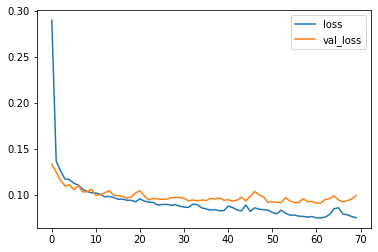

In [3]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

E di sicuro Keras ha interrotto l'addestramento ben prima dei 500 epoch completi!

## Esercizi

In questo esercizio, imparerete come migliorare i risultati dell'addestramento includendo un callback di arresto precoce per evitare l'overfitting.

Eseguite la cella successiva per impostare tutto!

In [4]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex4 import *

Per prima cosa caricare il set di dati di Spotify. Il vostro compito sarà quello di prevedere la popolarità di una canzone in base a varie caratteristiche audio, come il 'tempo', la 'ballabilità' e la 'modalità'.

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/spotify.csv')
X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


In [11]:
spotify.head(100000)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


Cominciamo con la rete più semplice, un modello lineare. Questo modello ha una bassa capacità.

Eseguire la cella successiva senza alcuna modifica per addestrare un modello lineare sul set di dati di Spotify.

Minimum Validation Loss: 0.1977


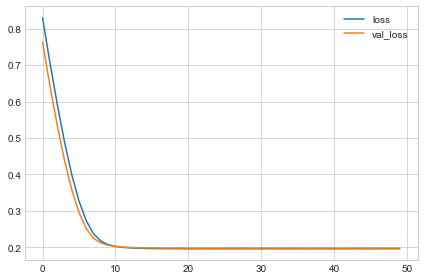

In [12]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Non è raro che le curve seguano un andamento a "bastone da hockey" come quello che si vede qui. Questo rende difficile vedere la parte finale dell'allenamento, per cui partiamo dall'epoca 10:

Minimum Validation Loss: 0.1977


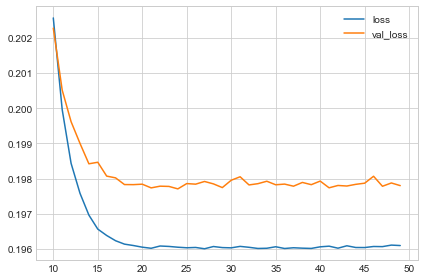

In [13]:
# Start the plot at epoch 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

### Valutare la Linea di Base
Cosa ne pensate? Direbbe che questo modello è underfitting, overfitting, giusto?

In [14]:
# View the solution (Run this cell to receive credit!)
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The gap between these curves is quite small and the validation loss never increases, so it's more likely that the network is underfitting than overfitting. It would be worth experimenting with more capacity to see if that's the case.

Ora aggiungiamo un po' di capacità alla nostra rete. Aggiungeremo tre livelli nascosti con 128 unità ciascuno. Eseguire la cella successiva per addestrare la rete e vedere le curve di apprendimento

Epoch 1/50
48/48 [==============================] - 0s 3ms/step - loss: 0.2466 - val_loss: 0.2093
Epoch 2/50
48/48 [==============================] - 0s 1ms/step - loss: 0.2020 - val_loss: 0.2034
Epoch 3/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1976 - val_loss: 0.2012
Epoch 4/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1940 - val_loss: 0.2007
Epoch 5/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1920 - val_loss: 0.1987
Epoch 6/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1904 - val_loss: 0.1988
Epoch 7/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1888 - val_loss: 0.1977
Epoch 8/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1872 - val_loss: 0.1974
Epoch 9/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1864 - val_loss: 0.1973
Epoch 10/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1849 - val_loss: 0.1971
Epoch 11/50
48/48 [

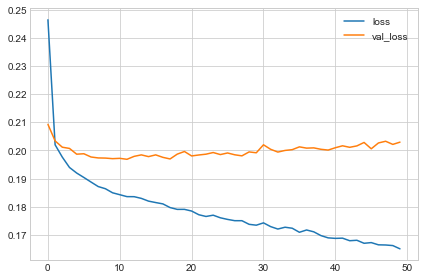

In [15]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

### Add Capacity
Qual è la vostra valutazione di queste curve? Underfitting, overfitting, giusto?

In [16]:
# View the solution (Run this cell to receive credit!)
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Now the validation loss begins to rise very early, while the training loss continues to decrease. This indicates that the network has begun to overfit. At this point, we would need to try something to prevent it, either by reducing the number of units or through a method like early stopping. (We'll see another in the next lesson!)

### Definisci l'Early Stopping Callback
Ora definiamo un **callback di arresto anticipato** che attende 5 epoche (patience') per una variazione della perdita di validazione di almeno 0,001 (**min_delta**) e mantiene i pesi con la perdita migliore (**restore_best_weights**).

In [17]:
from tensorflow.keras import callbacks

# YOUR CODE HERE: define an early stopping callback
early_stopping = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# Check your answer
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Epoch 1/50
48/48 [==============================] - 0s 2ms/step - loss: 0.2389 - val_loss: 0.2104
Epoch 2/50
48/48 [==============================] - 0s 1ms/step - loss: 0.2027 - val_loss: 0.2041
Epoch 3/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1970 - val_loss: 0.2010
Epoch 4/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1942 - val_loss: 0.1996
Epoch 5/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1912 - val_loss: 0.1986
Epoch 6/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1900 - val_loss: 0.1979
Epoch 7/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1880 - val_loss: 0.1976
Epoch 8/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1870 - val_loss: 0.1973
Epoch 9/50
48/48 [==============================] - 0s 1ms/step - loss: 0.1863 - val_loss: 0.1979
Epoch 10/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1850 - val_loss: 0.1964
Epoch 11/50
48/48 [

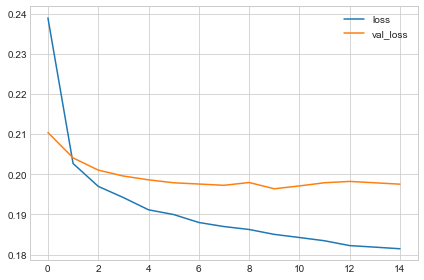

In [18]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

### Allenamento e interpretazione
Si è trattato di un miglioramento rispetto all'allenamento senza arresto anticipato?

In [19]:
# View the solution (Run this cell to receive credit!)
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The early stopping callback did stop the training once the network began overfitting. Moreover, by including `restore_best_weights` we still get to keep the model where validation loss was lowest.